## Group 4
- **Jaysen Lewin Surjanto** – 2802461391  
- **Matthew Owen Gunawan** – 2802489490  
- **Adrien Najwan Syahiran** – 2802492705  


# **1. Problem Understanding**

## **Problem Statement**
Public opinion on presidential candidates plays a crucial role in political communication and decision-making. Twitter provides massive unstructured data representing public sentiment and engagement toward political figures. Since the tweets are noisy and unstructured, data preprocessing, feature engineering, and machine learning modeling are required to extract meaningful insights.  
This study analyzes public views toward **Anies Baswedan**, **Ganjar Pranowo**, and **Prabowo Subianto** based on Twitter data.

## **Objective**
To combine and preprocess tweet datasets from the three presidential candidates, extract relevant features, and build a machine learning model for sentiment classification. The final goal is to analyze how the public interacts and expresses opinions toward each candidate.

## **Machine Learning Task**
The task in this project is **supervised sentiment classification**, where the model predicts whether a tweet is positive, negative, or neutral.


# **2. Data Description**

The dataset contains tweets about Anies Baswedan, Ganjar Pranowo, and Prabowo Subianto.  
Available fields include:

- Tweet text  
- Posting time (Date, Created)  
- Tweet location  
- Followers and Following count  
- Engagement attributes (like, reply, retweet)

### **Engineered Features**
- **Tweet-based:** tweet length, word count, hashtag count, mention count, caps ratio, URL indicator  
- **Time-based:** posting hour, posting weekday  
- **User-based:** follow ratio, log follow ratio  
- **Sentiment-based:** polarity, subjectivity (TextBlob)  
- **Candidate mentions:** detect “anies”, “ganjar”, “prabowo”  

Import Essensial Library

In [11]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline  # Untuk gabungkan SMOTE + model
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

**Load DataSet**

In [12]:
df1 = pd.read_csv("Anies Baswedan.csv", encoding="latin1")
df2 = pd.read_csv("Ganjar Pranowo.csv", encoding="latin1")
df3 = pd.read_csv("Prabowo Subianto.csv", encoding="latin1")

df = pd.concat([df1, df2, df3], ignore_index=True)
display(df)

,ï»¿Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,Tweet Location,Tweet,Unnamed: 0,Unnamed: 0.1
0,0.0,2023-04-16 10:04:35+00:00,2023-03-27 08:59:57+00:00,1.640000e+18,981,531,22,NaN,info anies presiden,NaN,NaN
1,1.0,2023-04-16 10:00:01+00:00,2012-08-21 07:34:04+00:00,7.710306e+08,10702,123,30121,"Palmerah, Jakarta",politisi partai gerindra sandiaga uno menjawab...,NaN,NaN
2,2.0,2023-04-16 09:14:46+00:00,2011-09-27 05:22:24+00:00,3.807551e+08,11,35,230,Jakarta - Utara,lanjut pak anies kita kawal sampai jadi presiden,NaN,NaN
3,3.0,2023-04-16 07:03:05+00:00,2017-10-19 12:32:28+00:00,9.210000e+17,37,47,2670,Jakarta,semoga allah swt menyelamatkan bangsa dan nega...,NaN,NaN
4,4.0,2023-04-16 06:03:59+00:00,2022-06-28 07:03:37+00:00,1.540000e+18,6,129,766,"Lebak, Banten",chotimah kasian ya pa anies makanya sudah teka...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29995,NaN,2022-12-08 08:32:40+00:00,2016-09-30 15:25:40+00:00,7.820000e+17,50,104,4398,"Kalimantan Timur, Indonesia",pak klo slalu turun kemasyarakt bisa lbih muda...,NaN,9995.0
29996,NaN,2022-12-08 08:26:00+00:00,2022-11-07 06:41:27+00:00,1.590000e+18,23,122,131,Yogyakarta,prabowo muda memang keren bismillah pak insyaa...,NaN,9996.0
29997,NaN,2022-12-08 08:06:00+00:00,2022-12-01 13:23:45+00:00,1.600000e+18,11,3,67,Surabaya,pokoknya prabowo mantap smg terpilih menjadi p...,NaN,9997.0
29998,NaN,2022-12-08 08:05:00+00:00,2022-12-02 02:44:35+00:00,1.600000e+18,50,83,103,NaN,optimis menjadi figur terbaik pergerakan petan...,NaN,9998.0


**Data Preprocessing**

In [13]:
df.describe()
df.isna().sum()

ï»¿Unnamed: 0.1    20000
Date                   0
Created                0
User ID                0
Followers              0
Following              0
Tweet Count            0
Tweet Location     16195
Tweet                269
Unnamed: 0         20000
Unnamed: 0.1       20000
dtype: int64

In [14]:
df.drop(columns=[col for col in df.columns if 'Unnamed' in col], inplace=True, errors='ignore')

In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.tz_localize(None)  
df['Created'] = pd.to_datetime(df['Created'], errors='coerce').dt.tz_localize(None)

In [16]:
df['Tweet Location'] = df['Tweet Location'].fillna('Unknown')
df['Tweet'] = df['Tweet'].fillna('Tweet')

In [17]:
df = df.reset_index(drop=True)

In [18]:
df.isna().sum()

Date              0
Created           0
User ID           0
Followers         0
Following         0
Tweet Count       0
Tweet Location    0
Tweet             0
dtype: int64

In [19]:
pd.DataFrame(df)

,Date,Created,User ID,Followers,Following,Tweet Count,Tweet Location,Tweet
0,2023-04-16 10:04:35,2023-03-27 08:59:57,1.640000e+18,981,531,22,Unknown,info anies presiden
1,2023-04-16 10:00:01,2012-08-21 07:34:04,7.710306e+08,10702,123,30121,"Palmerah, Jakarta",politisi partai gerindra sandiaga uno menjawab...
2,2023-04-16 09:14:46,2011-09-27 05:22:24,3.807551e+08,11,35,230,Jakarta - Utara,lanjut pak anies kita kawal sampai jadi presiden
3,2023-04-16 07:03:05,2017-10-19 12:32:28,9.210000e+17,37,47,2670,Jakarta,semoga allah swt menyelamatkan bangsa dan nega...
4,2023-04-16 06:03:59,2022-06-28 07:03:37,1.540000e+18,6,129,766,"Lebak, Banten",chotimah kasian ya pa anies makanya sudah teka...
...,...,...,...,...,...,...,...,...
29995,2022-12-08 08:32:40,2016-09-30 15:25:40,7.820000e+17,50,104,4398,"Kalimantan Timur, Indonesia",pak klo slalu turun kemasyarakt bisa lbih muda...
29996,2022-12-08 08:26:00,2022-11-07 06:41:27,1.590000e+18,23,122,131,Yogyakarta,prabowo muda memang keren bismillah pak insyaa...
29997,2022-12-08 08:06:00,2022-12-01 13:23:45,1.600000e+18,11,3,67,Surabaya,pokoknya prabowo mantap smg terpilih menjadi p...
29998,2022-12-08 08:05:00,2022-12-02 02:44:35,1.600000e+18,50,83,103,Unknown,optimis menjadi figur terbaik pergerakan petan...


**Feature Enginering**

Tweet Length

In [20]:
df['Tweet_Length'] = df['Tweet'].apply(len)
df['Tweet_WordCount'] = df['Tweet'].apply(lambda x: len(str(x).split()))

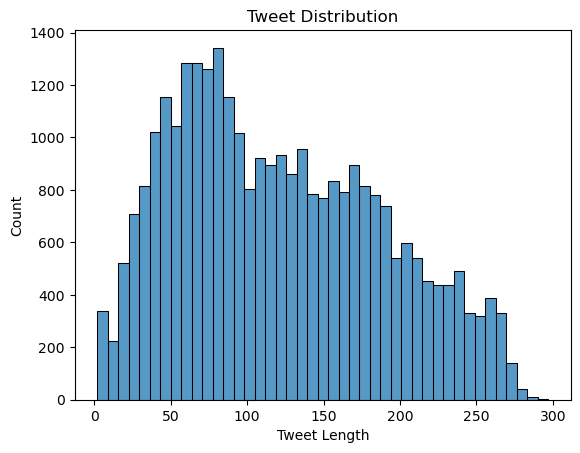

In [21]:
sns.histplot(df['Tweet_Length'])
plt.title('Tweet Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()

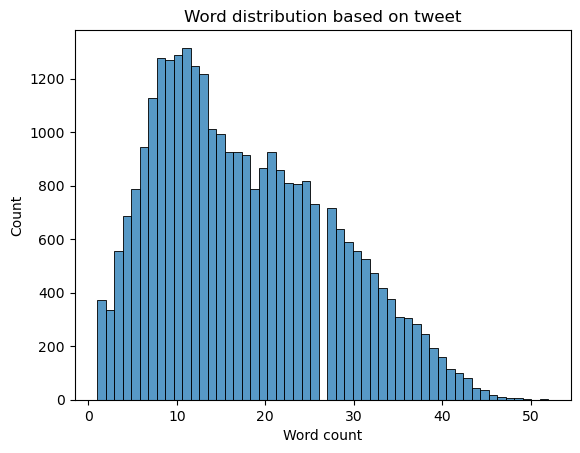

In [22]:
sns.histplot(df['Tweet_WordCount'])
plt.title('Word distribution based on tweet')
plt.xlabel('Word count')
plt.ylabel('Count')
plt.show()

Times Feature

In [23]:
df['Date_Hour'] = df['Date'].dt.hour           
df['Date_Weekday'] = df['Date'].dt.day_name()

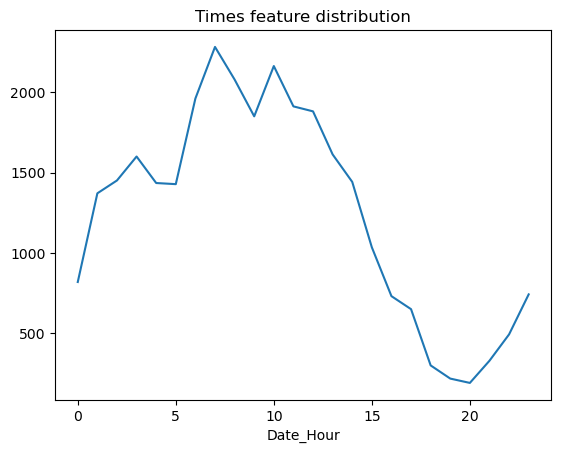

In [24]:
df['Date_Hour'].value_counts().sort_index().plot(kind='line')
plt.title('Times feature distribution')
plt.show()

Follow Ratio

In [25]:
df['Follow_Ratio'] = df['Followers'] / df['Following'].replace(0,1)

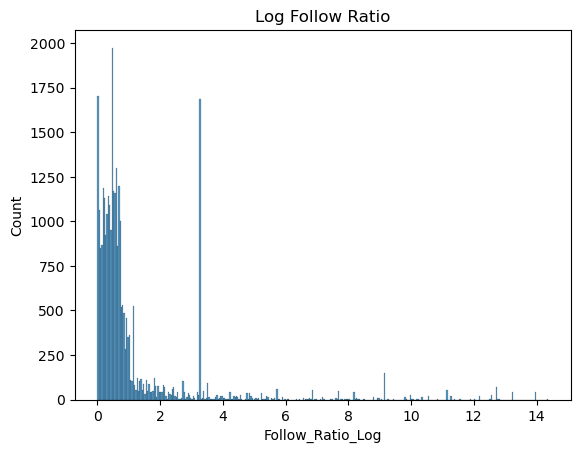

In [26]:
df['Follow_Ratio_Log'] = (df['Follow_Ratio'] + 1).apply(np.log)
sns.histplot(df['Follow_Ratio_Log'])
plt.title("Log Follow Ratio")
plt.show()

Sentiment Analysis based on polarity and Subjectivity

In [27]:
df['Sentiment_Polarity'] = df['Tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['Sentiment_Subjectivity'] = df['Tweet'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

Candidate mention based on tweet

In [28]:
df['Mention_Anies'] = df['Tweet'].str.contains('anies', case=False)
df['Mention_Ganjar'] = df['Tweet'].str.contains('ganjar', case=False)
df['Mention_Prabowo'] = df['Tweet'].str.contains('prabowo', case=False)

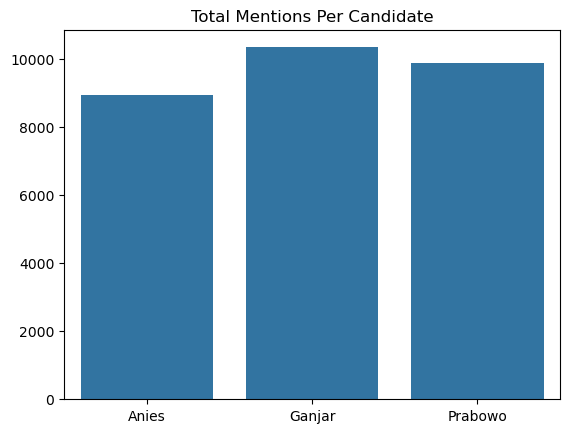

In [29]:
mentions = {
    'Anies': df['Mention_Anies'].sum(),
    'Ganjar': df['Mention_Ganjar'].sum(),
    'Prabowo': df['Mention_Prabowo'].sum(),
}

sns.barplot(x=list(mentions.keys()), y=list(mentions.values()))
plt.title("Total Mentions Per Candidate")
plt.show()

Hastag count

In [30]:
df['Hashtag_Count'] = df['Tweet'].str.count('#')

Mention (@) count

In [31]:
df['Mention_Count'] = df['Tweet'].str.count('@')

Caps Ratio

In [32]:
df['Caps_Ratio'] = df['Tweet'].apply(lambda x: sum(c.isupper() for c in x) / len(x) if len(x)>0 else 0)

URL Flag

In [33]:
df['Has_URL'] = df['Tweet'].str.contains('http', regex=False).astype(int)

In [34]:
df['Sentiment_Polarity'] = df['Tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['Sentiment_Subjectivity'] = df['Tweet'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)


In [35]:
def polarity_to_label(p):
    if p > 0.05:
        return "positive"
    elif p < -0.05:
        return "negative"
    else:
        return "neutral"

df['Sentiment_Label'] = df['Sentiment_Polarity'].apply(polarity_to_label)


**Model Builder**

In [36]:
text_col = ['Tweet']

numeric_cols = [
    'Tweet_Length','Tweet_WordCount','Hashtag_Count','Mention_Count',
    'Caps_Ratio','Has_URL','Follow_Ratio_Log','Sentiment_Subjectivity'
]

categorical_cols = ['Date_Weekday']

X = df[text_col + numeric_cols + categorical_cols]
y = df['Sentiment_Label']


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
text_pipeline = Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.iloc[:, 0].astype(str), validate=False)),
    ('tfidf', TfidfVectorizer(max_features=20000, ngram_range=(1, 2), stop_words='english'))
])

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('text', text_pipeline, text_col),
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [39]:
lr = LogisticRegression(max_iter=2000, class_weight='balanced', solver='saga')
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

In [40]:
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('gb', gb)
    ],
    voting='soft'
)

In [41]:
pipeline = ImbPipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', ensemble_model)
])

In [42]:
print("Training model...")
pipeline.fit(X_train, y_train)
print("Training selesai!\n")

Training model...
Training selesai!



In [43]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9966666666666667
              precision    recall  f1-score   support

    negative       0.98      0.81      0.89        58
     neutral       1.00      1.00      1.00      5780
    positive       0.91      0.99      0.95       162

    accuracy                           1.00      6000
   macro avg       0.96      0.93      0.94      6000
weighted avg       1.00      1.00      1.00      6000

